In [15]:
import numpy as np
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
np.random.seed(1)
%matplotlib inline

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
])
train_dataset = datasets.MNIST("./data", train=True, download=True, transform=transform)
test_dataset = datasets.MNIST("./data", train=False, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=128)
test_loader = DataLoader(test_dataset, batch_size=128)

In [3]:
def dataloader_to_numpy(loader):
    all_data = []
    all_labels = []
    for data, labels in loader:
        all_data.append(data.numpy())
        all_labels.append(labels.numpy())
    all_data = np.concatenate(all_data, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)
    return all_data, all_labels

# convert train and test data loaders to numpy arrays
X_train, Y_train = dataloader_to_numpy(train_loader)
X_test, Y_test = dataloader_to_numpy(test_loader)

In [4]:
X_train.shape

(60000, 1, 28, 28)

In [7]:
Y_train[0]

np.int64(5)

In [368]:
def initialize_parameters():
    # initialize weights
    w1 = np.random.randn(784, 128) * np.sqrt(2.0 / 784)
    w2 = np.random.randn(128, 10) * np.sqrt(2.0 / 128)
    # initialize biases
    b1 = np.zeros((1, 128))
    b2 = np.zeros((1, 10))
    
    return w1, b1, w2, b2

In [369]:
def relu(x):
    return np.maximum(x, 0)
def softmax(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / np.sum(e_x, axis=1, keepdims=True)

In [376]:
w1, b1, w2, b2 = initialize_parameters()

In [377]:
batch_size, learning_rate = 128, 0.001
losses, accuracies = [], []
for k in range(1000):
    samples = np.random.choice(X_train.shape[0], batch_size, replace=False)
    x = X_train[samples].reshape(-1, 28*28)
    y = Y_train[samples]
    y_one_hot = np.zeros((batch_size, 10))
    y_one_hot[np.arange(len(y)), y] = 1
    
    # forward pass
    z1 = np.dot(x, w1) + b1
    z1_relu = relu(z1)
    z2 = np.dot(z1_relu, w2) + b2
    z2_sm = softmax(z2)
    preds = np.argmax(z2_sm, axis=1)
    accuracy = np.mean(preds == y)
    probs = z2_sm[np.arange(len(y)), y]
    loss = -np.log(probs).mean(axis=0)
    accuracies.append(accuracy)
    losses.append(loss)
    # backward pass
    dz2 = z2_sm - y_one_hot
    dw2 = np.dot(z1_relu.T, dz2)
    db2 = np.sum(dz2, axis=0, keepdims=True)
    dz1_relu = np.dot(dz2, w2.T)
    dz1 = dz1_relu * (z1 > 0)
    dw1 = np.dot(x.T, dz1)
    db1 = np.sum(dz1, axis=0, keepdims=True)
    # sgd update
    w2 -= learning_rate*dw2
    b2 -= learning_rate*db2
    w1 -= learning_rate*dw1
    b1 -= learning_rate*db1
    print(loss, accuracy)

2.4899636643548195 0.1015625
2.2849402247334583 0.1796875
2.1154776806699536 0.2578125
1.9335879087080377 0.4453125
1.9171511869402715 0.421875
1.8278730922192685 0.5390625
1.7037928620979774 0.59375
1.659982218223703 0.578125
1.4388159477326048 0.703125
1.3926527088821699 0.71875
1.2752510577475926 0.7109375
1.2652520791371709 0.71875
1.2987380660488141 0.6796875
1.1868193581873596 0.734375
1.1893979769230238 0.6875
1.068989667928404 0.8203125
0.9432998613455992 0.8203125
1.094631203274944 0.7109375
0.9910364544498689 0.7734375
0.9078106748940017 0.859375
0.9558652950278639 0.7890625
0.8189852916815057 0.8515625
0.8073590181019582 0.8046875
0.932982644056592 0.7734375
0.8712356179381903 0.765625
0.8840657640443916 0.765625
0.7810278807066187 0.8515625
0.7862540582953578 0.8203125
0.8175342753591655 0.7734375
0.8224934054370466 0.796875
0.7592651514743409 0.765625
0.8512416028230395 0.7265625
0.6940742065236069 0.8359375
0.7021584412112307 0.859375
0.7303262793492188 0.828125
0.6851822

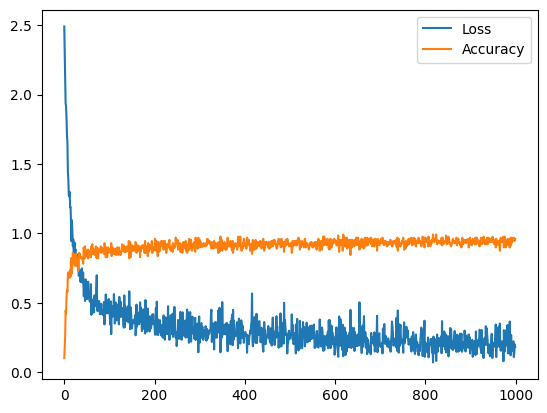

In [387]:
plt.plot(losses)
plt.plot(accuracies)
plt.legend(["Loss", "Accuracy"])

In [389]:
correct, total = 0, 0
X_test = X_test.reshape(-1, 28*28)

In [416]:
z1 = np.dot(X_test, w1) + b1
z1_relu = relu(z1)
z2 = np.dot(z1_relu, w2) + b2
z2_sm = softmax(z2)
preds = np.argmax(z2_sm, axis=1)
test_accuracy = np.mean(preds == Y_test)

In [419]:
test_accuracy

np.float64(0.9425)

In [469]:
def predict(x):
    z1 = np.dot(x, w1) + b1
    z1_relu = relu(z1)
    z2 = np.dot(z1_relu, w2) + b2
    z2_sm = softmax(z2)
    preds = np.argmax(z2_sm, axis=1)
    return preds

In [473]:
predict(X_train[0].reshape(-1, 28*28))

array([5])

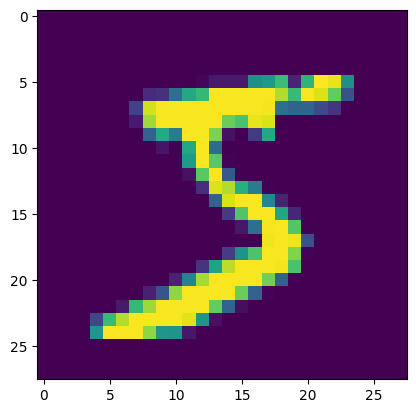

In [474]:
plt.imshow(X_train[0][0])